## Problem Statement :

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('bank-full.csv', sep = ';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.shape

(45211, 17)

In [5]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [7]:
data['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [8]:
data['poutcome'].value_counts()   ### poutcome means the result of the previous campaign

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

## target variable analysis

In [10]:
data['y'].value_counts(normalize = True) * 100

no     88.30152
yes    11.69848
Name: y, dtype: float64

### Observations:

1. 88.3% of the people are not interested in the marketing campaign hence the respone is no
2. 11.5% of the people are interested hence the response yes

<Axes: xlabel='y', ylabel='count'>

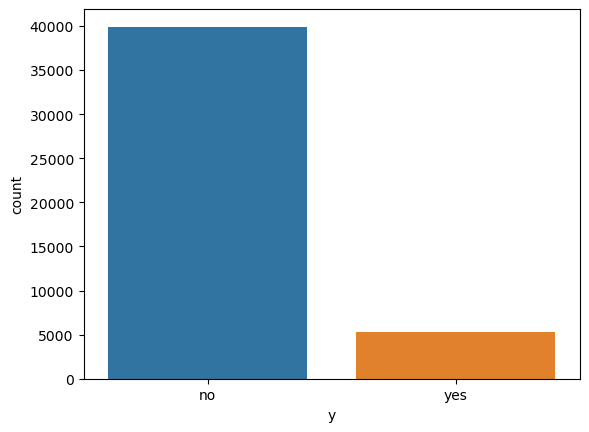

In [12]:
sns.countplot(x = data['y'])

## Observations:

- There is a problem of class imbalance in this data

<Axes: xlabel='job', ylabel='count'>

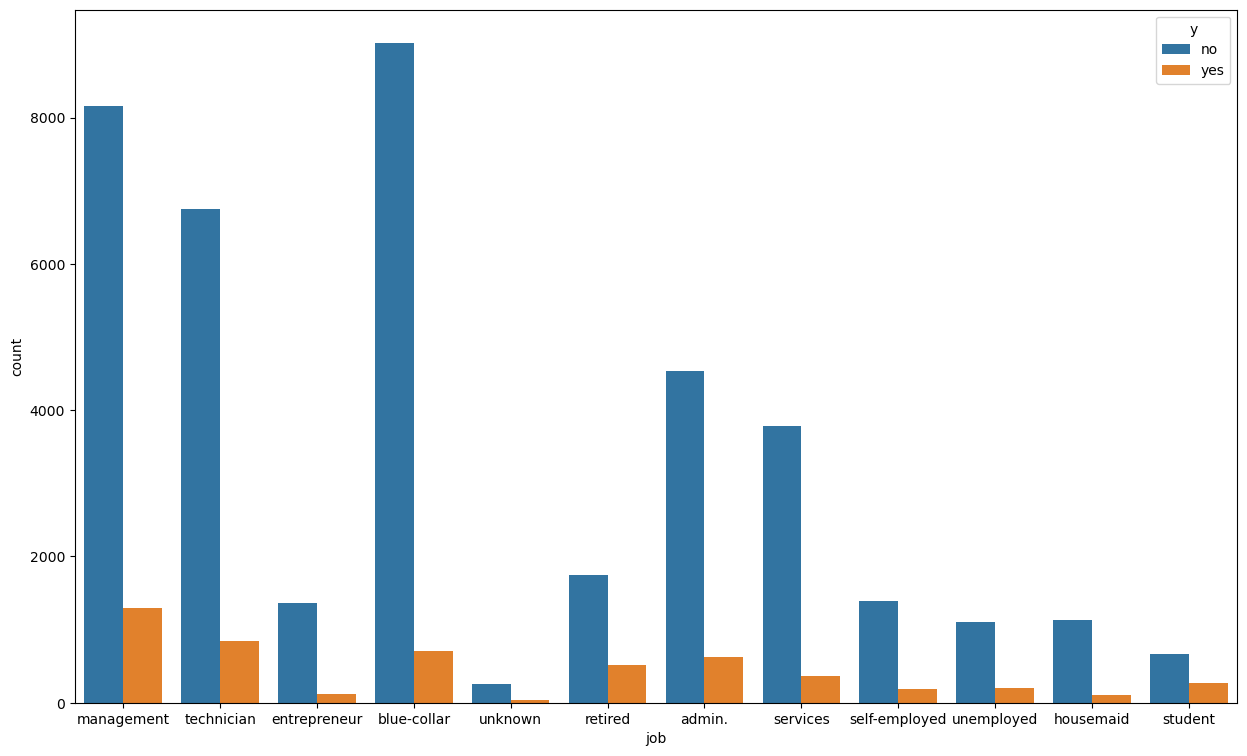

In [14]:
plt.figure(figsize = (15, 9))
sns.countplot(x = data['job'], hue = data['y'])

## Observations:

- Customers from Management positions, technicians plus the blue collar job are the highest contacted along with admin and services. Customers having fixed income source have been contacted
- Customers with not a fixed source, low income source are not contacted like entrepreneur, self - employeed, housemaids, students

In [15]:
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

## If the job is unknown and bank not showing any interest in these unknown job position customers then we can group them into low income source group or no fixed income source group

In [16]:
data['job'] = data['job'].replace({'unknown' : 'unemployed'})
data['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
unemployed       1591
self-employed    1579
entrepreneur     1487
housemaid        1240
student           938
Name: job, dtype: int64

In [17]:
1303 + 288

1591

<Axes: xlabel='balance', ylabel='Density'>

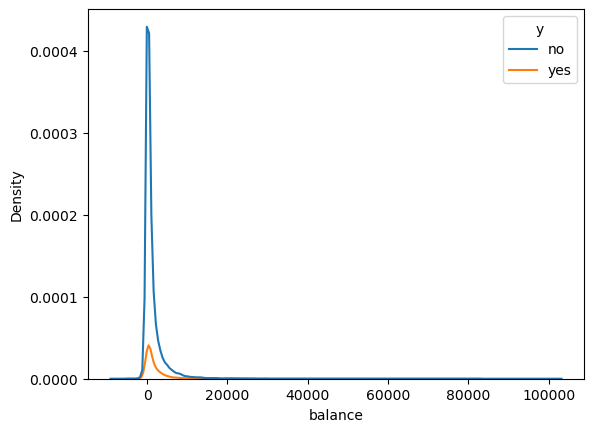

In [21]:
## balance and outcome

sns.kdeplot(x = data['balance'], hue = data['y'])

<Axes: xlabel='balance'>

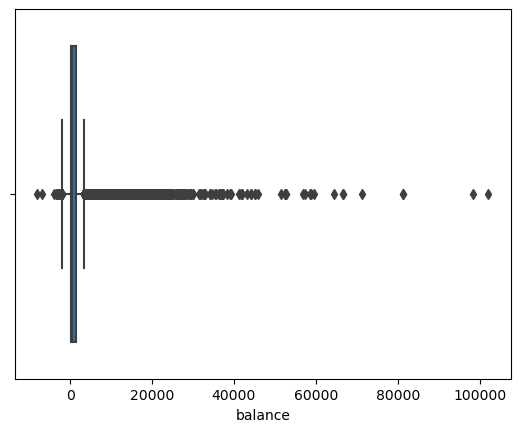

In [22]:
sns.boxplot(x = data['balance'])

## Observations:

- Balanace has the lot of outliers. Conclusion: outlier treatment is highly necessary

<Axes: xlabel='education', ylabel='count'>

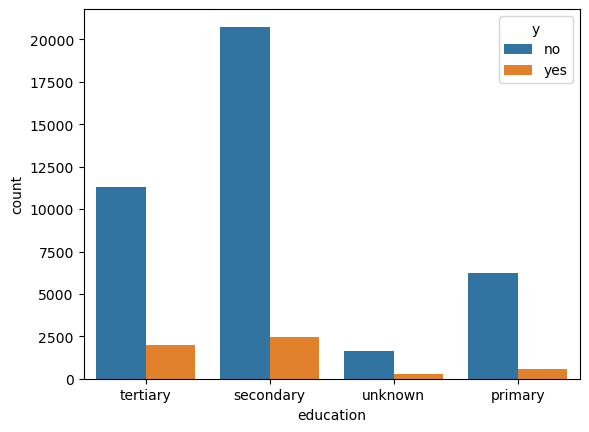

In [23]:
## education
sns.countplot(x =data['education'], hue = data['y'])

## Clubbing the unknown with primary customers

In [24]:
data['education'] = data['education'].replace({'unknown' : 'primary'})
data['education'].value_counts()

secondary    23202
tertiary     13301
primary       8708
Name: education, dtype: int64

In [25]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,primary,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unemployed,single,primary,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


<Axes: xlabel='poutcome', ylabel='count'>

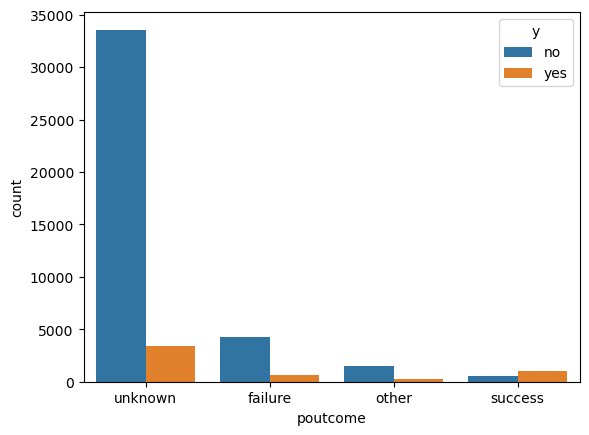

In [26]:
sns.countplot(x = data['poutcome'], hue = data['y'])

## Observations:

1. Lot of unknown values in poutcome. This indicates a prabability that the bank did not maintain
or follow with the previous marketing campaign closely
2. When the 